In [72]:
import pandas as pd
import pickle
import numpy as np

In [6]:
complex_df = pd.read_pickle('/home/ubuntu/complex_label.pkl')

In [7]:
complex_df.columns

Index(['GeneAB', 'Same_Complex'], dtype='object')

In [8]:
pw = pd.read_pickle('/home/ubuntu/allpairs_spearman_correlation.pkl')

In [13]:
import os
df=pd.DataFrame()
for f in os.listdir('/home/ubuntu/scgpt_split_outputs'):
    if f.startswith('scGPT'):
        
        name = f[:-20]
        print(f'Loading {name}...')
        data = pd.read_pickle('/home/ubuntu/scgpt_split_outputs/' + f)
        df[name] = data['Cosine_Similarity'].to_list()

Loading scGPT_bc_embeddings_similarities...
Loading scGPT_pancancer_embeddings_similarities...
Loading scGPT_CP_embeddings_similarities...
Loading scGPT_lung_embeddings_similarities...
Loading scGPT_heart_embeddings_similarities...
Loading scGPT_brain_embeddings_similarities...
Loading scGPT_kidney_embeddings_similarities...
Loading scGPT_human_embeddings_similarities...


In [14]:
for f in os.listdir('/home/ubuntu/gf_split_outputs'):
    if f.startswith('GF'):
        
        name = f[:-20]
        print(f'Loading {name}...')
        data = pd.read_pickle('/home/ubuntu/gf_split_outputs/' + f)
        df[name] = data['Cosine_Similarity'].to_list()

Loading GF-6L30M_HUMANemb_similarities...
Loading GF-20L95M_HUMANemb_similarities...
Loading GF-12L95M_HUMANemb_similarities...
Loading GF-12L95MCANCER_UNIPROT_HUMANemb_similarities...
Loading GF-12L30M_HUMANemb_similarities...


In [15]:
df['Correlation'] = pw['Correlation'].to_list()

In [16]:
df['Same_Complex'] = complex_df['Same_Complex'].to_list()

In [17]:
# df['Gene_A'] = gene_pairs['Gene_A'].to_list()
# df['Gene_B'] = gene_pairs['Gene_B'].to_list()

df['GeneAB'] = complex_df['GeneAB'].to_list()

In [18]:
df

,scGPT_bc_embeddings_similarities,scGPT_pancancer_embeddings_similarities,scGPT_CP_embeddings_similarities,scGPT_lung_embeddings_similarities,scGPT_heart_embeddings_similarities,scGPT_brain_embeddings_similarities,scGPT_kidney_embeddings_similarities,scGPT_human_embeddings_similarities,GF-6L30M_HUMANemb_similarities,GF-20L95M_HUMANemb_similarities,GF-12L95M_HUMANemb_similarities,GF-12L95MCANCER_UNIPROT_HUMANemb_similarities,GF-12L30M_HUMANemb_similarities,Correlation,Same_Complex,GeneAB
0,NaN,0.566069,0.356636,0.224554,0.117288,0.114432,0.149671,0.357125,NaN,NaN,NaN,NaN,NaN,0.395247,0,ST13P4_WASH2P
1,NaN,-0.083783,0.105390,0.051439,0.034904,0.051954,0.024855,0.106240,NaN,NaN,NaN,NaN,NaN,0.121127,0,ST13P4_FAM90A12P
2,NaN,0.336766,0.159616,0.118687,0.068871,0.069045,0.060269,0.160441,NaN,NaN,NaN,NaN,NaN,0.359050,0,ST13P4_PI4KAP1
3,NaN,0.258465,0.210777,0.104398,0.070150,0.016221,0.079906,0.211458,NaN,NaN,NaN,NaN,NaN,0.273463,0,ST13P4_SNX29P2
4,NaN,0.151502,0.099180,-0.046862,-0.016629,0.038130,-0.063625,0.100117,NaN,NaN,NaN,NaN,NaN,0.378892,0,ST13P4_ZNF818P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200794870,NaN,0.058843,-0.123608,0.025317,0.011302,0.020572,0.028625,-0.122569,NaN,NaN,NaN,NaN,NaN,NaN,0,RBMXP1_PPT1
200794871,NaN,0.055566,0.068872,0.036179,-0.039677,-0.038647,-0.015523,0.069859,NaN,NaN,NaN,NaN,NaN,NaN,0,RBMXP1_PLD2
200794872,NaN,0.012171,-0.037853,-0.023328,-0.022463,-0.078864,-0.025873,-0.037521,NaN,NaN,NaN,NaN,NaN,NaN,0,RBMXP1_EIF4EBP1
200794873,NaN,0.020594,0.128618,0.060834,0.002627,-0.001737,0.032308,0.135589,NaN,NaN,NaN,NaN,NaN,NaN,0,RBMXP1_TINAG


In [19]:
#df.to_pickle('full_dataset.pkl')

In [22]:
X_full = df.dropna()

In [23]:

FEATURES_og = ['scGPT_bc_embeddings_Cosine_Similarity',
       'scGPT_pancancer_embeddings_Cosine_Similarity',
       'scGPT_lung_embeddings_Cosine_Similarity',
       'scGPT_heart_embeddings_Cosine_Similarity',
       'scGPT_brain_embeddings_Cosine_Similarity',
       'scGPT_kidney_embeddings_Cosine_Similarity',
       'scGPT_human_embeddings_Cosine_Similarity',
       'GF-6L30M_HUMANemb_Cosine_Similarity',
       'GF-20L95M_HUMANemb_Cosine_Similarity',
       'GF-12L95M_HUMANemb_Cosine_Similarity',
       'GF-12L95MCANCER_UNIPROT_HUMANemb_Cosine_Similarity',
       'GF-12L30M_HUMANemb_Cosine_Similarity', 'Correlation']

FEATURES = ['scGPT_bc_embeddings_similarities',
       'scGPT_pancancer_embeddings_similarities',
       'scGPT_lung_embeddings_similarities',
       'scGPT_heart_embeddings_similarities',
       'scGPT_brain_embeddings_similarities',
       'scGPT_kidney_embeddings_similarities',
       'scGPT_human_embeddings_similarities',
       'GF-6L30M_HUMANemb_similarities',
       'GF-20L95M_HUMANemb_similarities',
       'GF-12L95M_HUMANemb_similarities',
       'GF-12L95MCANCER_UNIPROT_HUMANemb_similarities',
       'GF-12L30M_HUMANemb_similarities', 'Correlation']

mapper = dict(zip(FEATURES, FEATURES_og))

with open('/home/ubuntu/all_model_results.pkl', 'rb') as f:
    all_model_results = pickle.load(f)

X_full.rename(columns=mapper, inplace=True)
for mod in list(all_model_results.keys()):
    for p in ['predictions', 'probabilities']:
        col_name = f'{mod} {p}'
        X_full[col_name] = all_model_results[mod][p]

In [25]:
X_full[X_full['Random Forest probabilities'] == 1]

,scGPT_bc_embeddings_Cosine_Similarity,scGPT_pancancer_embeddings_Cosine_Similarity,scGPT_CP_embeddings_similarities,scGPT_lung_embeddings_Cosine_Similarity,scGPT_heart_embeddings_Cosine_Similarity,scGPT_brain_embeddings_Cosine_Similarity,scGPT_kidney_embeddings_Cosine_Similarity,scGPT_human_embeddings_Cosine_Similarity,GF-6L30M_HUMANemb_Cosine_Similarity,GF-20L95M_HUMANemb_Cosine_Similarity,GF-12L95M_HUMANemb_Cosine_Similarity,GF-12L95MCANCER_UNIPROT_HUMANemb_Cosine_Similarity,GF-12L30M_HUMANemb_Cosine_Similarity,Correlation,Same_Complex,GeneAB,Random Forest predictions,Random Forest probabilities
1151261,0.310062,0.260865,0.372112,0.334155,0.434231,0.280123,0.281487,0.371856,0.187554,0.156613,0.563514,0.704585,0.539965,0.289901,0,PTPRG_PRKG1,1,1.0
1238454,0.396940,0.478973,0.459737,0.268494,0.201548,0.500802,0.276350,0.459793,0.385883,0.216736,0.679901,0.739117,0.697685,0.108540,0,SMC4_HMGB2,1,1.0
1408464,0.322717,0.395265,0.373207,0.313983,0.245990,0.345641,0.249374,0.373149,0.185368,0.125397,0.368968,0.368912,0.357304,0.416778,0,PTMA_PPIA,1,1.0
1408581,0.260720,0.257810,0.245219,0.301628,0.271006,0.270423,0.259273,0.244987,0.210604,0.069025,0.319365,0.336060,0.256612,0.193614,0,PTMA_RPL27,1,1.0
1410200,0.338651,0.388359,0.340048,0.292769,0.258887,0.338042,0.280975,0.340557,0.254309,0.126192,0.361937,0.396581,0.324259,0.434066,0,PTMA_HNRNPA2B1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198214628,0.231059,0.287458,0.306510,0.179297,0.175700,0.214254,0.140390,0.305612,0.168160,0.123309,0.693271,0.751594,0.716157,0.220873,0,PDCD5_RANBP1,1,1.0
198216249,0.229453,0.355902,0.326234,0.167183,0.137923,0.249710,0.074837,0.325198,0.241073,0.139584,0.696885,0.743937,0.757686,0.397683,0,PDCD5_LSM7,1,1.0
198218509,0.142318,0.266025,0.325898,0.144477,0.115006,0.149627,0.107779,0.325563,0.181983,0.227531,0.755062,0.787857,0.748057,0.215292,0,PDCD5_POLD2,1,1.0
198219119,0.083046,0.080239,0.015837,0.043744,0.013420,-0.139327,-0.022617,0.015780,0.386818,0.203508,0.749740,0.820959,0.830008,0.394768,1,SMARCD2_SMARCA2,1,1.0


In [38]:
chunk100k = X_full.sort_values(by='Random Forest probabilities', ascending=False).head(100000)#.to_csv('top_100k_RF_probs.csv', index=False)

In [40]:
chunk100k

,scGPT_bc_embeddings_Cosine_Similarity,scGPT_pancancer_embeddings_Cosine_Similarity,scGPT_CP_embeddings_similarities,scGPT_lung_embeddings_Cosine_Similarity,scGPT_heart_embeddings_Cosine_Similarity,scGPT_brain_embeddings_Cosine_Similarity,scGPT_kidney_embeddings_Cosine_Similarity,scGPT_human_embeddings_Cosine_Similarity,GF-6L30M_HUMANemb_Cosine_Similarity,GF-20L95M_HUMANemb_Cosine_Similarity,GF-12L95M_HUMANemb_Cosine_Similarity,GF-12L95MCANCER_UNIPROT_HUMANemb_Cosine_Similarity,GF-12L30M_HUMANemb_Cosine_Similarity,Correlation,Same_Complex,GeneAB,Random Forest predictions,Random Forest probabilities
60092321,0.296157,0.309707,0.337537,0.228413,0.280708,0.308156,0.209883,0.336975,0.277328,0.121264,0.358272,0.374212,0.374734,-0.075706,0,BTF3_RPS24,1,1.00
162564788,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,0.116481,0.140258,0.332089,0.374807,0.291368,0.207873,1,RPL5_UBA52,1,1.00
162565571,0.310541,0.220608,0.281036,0.209491,0.283529,0.333424,0.271993,0.280296,0.123899,0.104455,0.284647,0.314562,0.256233,0.281630,0,RPL5_RPS26,1,1.00
146825512,0.232431,0.368281,0.291339,0.096098,0.083612,0.200820,0.060273,0.291591,0.183954,0.089025,0.793632,0.834135,0.789444,0.557237,0,NDUFS2_PDHB,1,1.00
162565414,0.341122,0.292692,0.378474,0.313464,0.277423,0.384747,0.292772,0.377679,0.150621,0.127675,0.266775,0.276904,0.189188,0.027233,0,RPL5_RPS19,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83228135,0.154429,0.214632,0.249439,0.174049,0.076923,0.197419,0.092443,0.248917,0.271641,0.152418,0.747013,0.814668,0.780452,0.171603,0,M6PR_OSTF1,1,0.93
60587414,0.171104,0.175379,0.208610,0.002157,0.013202,0.206633,0.000355,0.208476,0.145860,0.194916,0.817652,0.859507,0.803081,0.263356,0,CIAO2A_MRPL35,1,0.93
68577767,0.097781,0.273221,0.302352,0.114269,0.070793,0.342801,0.063747,0.302504,0.230146,0.150132,0.847752,0.886417,0.809359,0.237878,0,MRPL16_PREB,1,0.93
59582354,0.200033,0.280926,0.251364,0.055195,0.060346,0.193622,0.043555,0.251217,0.135347,0.164286,0.819404,0.864307,0.779704,0.210468,0,TATDN1_BTF3L4,1,0.93


<Axes: >

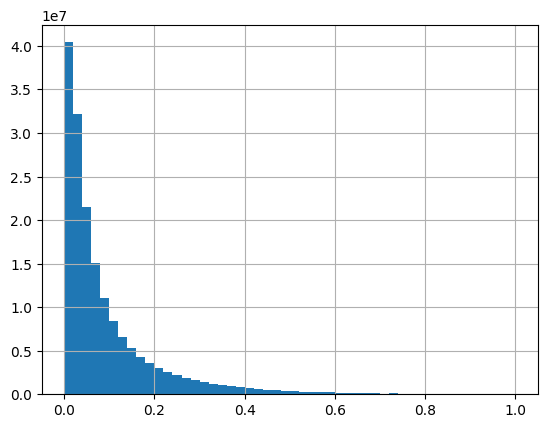

In [36]:
X_full['Random Forest probabilities'].hist(bins=50)

<Axes: >

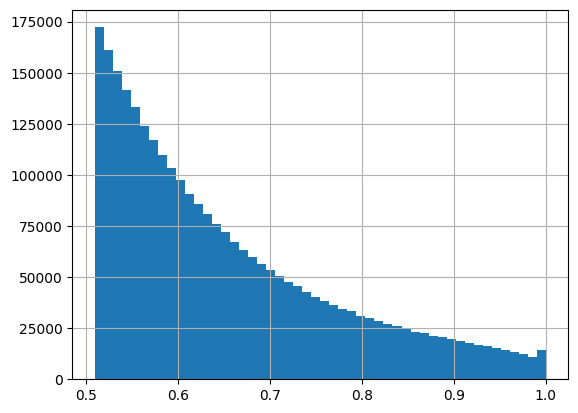

In [32]:
X_full[X_full['Random Forest predictions']==1]['Random Forest probabilities'].hist(bins=50)

<Axes: >

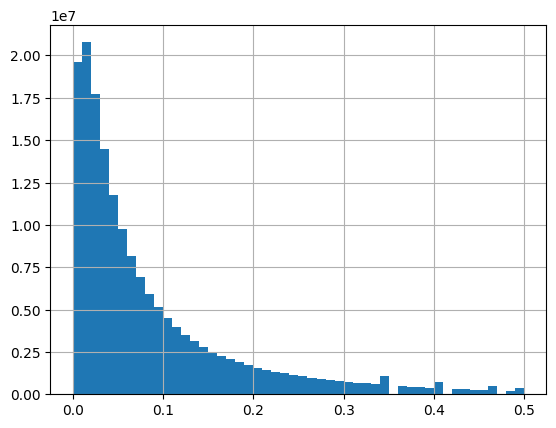

In [33]:
X_full[X_full['Random Forest predictions']==0]['Random Forest probabilities'].hist(bins=50)

<Axes: >

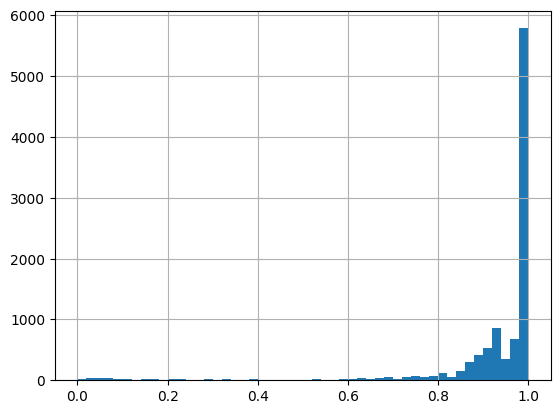

In [34]:
X_full[X_full['Same_Complex']==1]['Random Forest probabilities'].hist(bins=50)

<Axes: >

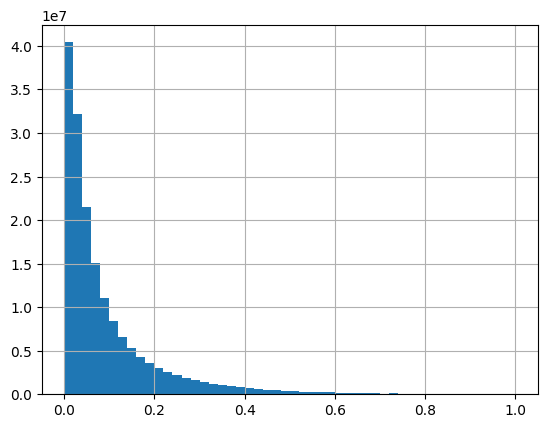

In [37]:
X_full[X_full['Same_Complex']==0]['Random Forest probabilities'].hist(bins=50)

In [41]:
chunk100k[['Gene_A', 'Gene_B']] = chunk100k['GeneAB'].str.split('_', expand=True)

In [43]:
complex_link = pd.read_csv('gene_complex_link.csv')
complex_link_a = complex_link.rename(columns={'gene_name':'Gene_A'})
complex_link_b = complex_link.rename(columns={'gene_name':'Gene_B'})

In [51]:
complex_link_a

,Gene_A,complex_id
0,SMAD3,CPX-1
1,SMAD4,CPX-1
2,SMAD2,CPX-1
3,CREB1,CPX-8
4,ATF4,CPX-8
...,...,...
8807,FBXL2,CPX-3292
8808,RBX1,CPX-3295
8809,SKP1,CPX-3295
8810,SKP2,CPX-3295


In [58]:
chunk100k

,scGPT_bc_embeddings_Cosine_Similarity,scGPT_pancancer_embeddings_Cosine_Similarity,scGPT_CP_embeddings_similarities,scGPT_lung_embeddings_Cosine_Similarity,scGPT_heart_embeddings_Cosine_Similarity,scGPT_brain_embeddings_Cosine_Similarity,scGPT_kidney_embeddings_Cosine_Similarity,scGPT_human_embeddings_Cosine_Similarity,GF-6L30M_HUMANemb_Cosine_Similarity,GF-20L95M_HUMANemb_Cosine_Similarity,GF-12L95M_HUMANemb_Cosine_Similarity,GF-12L95MCANCER_UNIPROT_HUMANemb_Cosine_Similarity,GF-12L30M_HUMANemb_Cosine_Similarity,Correlation,Same_Complex,GeneAB,Random Forest predictions,Random Forest probabilities,Gene_A,Gene_B
60092321,0.296157,0.309707,0.337537,0.228413,0.280708,0.308156,0.209883,0.336975,0.277328,0.121264,0.358272,0.374212,0.374734,-0.075706,0,BTF3_RPS24,1,1.00,BTF3,RPS24
162564788,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,0.116481,0.140258,0.332089,0.374807,0.291368,0.207873,1,RPL5_UBA52,1,1.00,RPL5,UBA52
162565571,0.310541,0.220608,0.281036,0.209491,0.283529,0.333424,0.271993,0.280296,0.123899,0.104455,0.284647,0.314562,0.256233,0.281630,0,RPL5_RPS26,1,1.00,RPL5,RPS26
146825512,0.232431,0.368281,0.291339,0.096098,0.083612,0.200820,0.060273,0.291591,0.183954,0.089025,0.793632,0.834135,0.789444,0.557237,0,NDUFS2_PDHB,1,1.00,NDUFS2,PDHB
162565414,0.341122,0.292692,0.378474,0.313464,0.277423,0.384747,0.292772,0.377679,0.150621,0.127675,0.266775,0.276904,0.189188,0.027233,0,RPL5_RPS19,1,1.00,RPL5,RPS19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83228135,0.154429,0.214632,0.249439,0.174049,0.076923,0.197419,0.092443,0.248917,0.271641,0.152418,0.747013,0.814668,0.780452,0.171603,0,M6PR_OSTF1,1,0.93,M6PR,OSTF1
60587414,0.171104,0.175379,0.208610,0.002157,0.013202,0.206633,0.000355,0.208476,0.145860,0.194916,0.817652,0.859507,0.803081,0.263356,0,CIAO2A_MRPL35,1,0.93,CIAO2A,MRPL35
68577767,0.097781,0.273221,0.302352,0.114269,0.070793,0.342801,0.063747,0.302504,0.230146,0.150132,0.847752,0.886417,0.809359,0.237878,0,MRPL16_PREB,1,0.93,MRPL16,PREB
59582354,0.200033,0.280926,0.251364,0.055195,0.060346,0.193622,0.043555,0.251217,0.135347,0.164286,0.819404,0.864307,0.779704,0.210468,0,TATDN1_BTF3L4,1,0.93,TATDN1,BTF3L4


In [65]:
complex_link_a.merge(chunk100k, on = 'Gene_A', how = 'right')

,Gene_A,complex_id,scGPT_bc_embeddings_Cosine_Similarity,scGPT_pancancer_embeddings_Cosine_Similarity,scGPT_CP_embeddings_similarities,scGPT_lung_embeddings_Cosine_Similarity,scGPT_heart_embeddings_Cosine_Similarity,scGPT_brain_embeddings_Cosine_Similarity,scGPT_kidney_embeddings_Cosine_Similarity,scGPT_human_embeddings_Cosine_Similarity,...,GF-20L95M_HUMANemb_Cosine_Similarity,GF-12L95M_HUMANemb_Cosine_Similarity,GF-12L95MCANCER_UNIPROT_HUMANemb_Cosine_Similarity,GF-12L30M_HUMANemb_Cosine_Similarity,Correlation,Same_Complex,GeneAB,Random Forest predictions,Random Forest probabilities,Gene_B
0,BTF3,CPX-676,0.296157,0.309707,0.337537,0.228413,0.280708,0.308156,0.209883,0.336975,...,0.121264,0.358272,0.374212,0.374734,-0.075706,0,BTF3_RPS24,1,1.00,RPS24
1,RPL5,CPX-5183,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,...,0.140258,0.332089,0.374807,0.291368,0.207873,1,RPL5_UBA52,1,1.00,UBA52
2,RPL5,CPX-7664,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,...,0.140258,0.332089,0.374807,0.291368,0.207873,1,RPL5_UBA52,1,1.00,UBA52
3,RPL5,CPX-7665,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,...,0.140258,0.332089,0.374807,0.291368,0.207873,1,RPL5_UBA52,1,1.00,UBA52
4,RPL5,CPX-5183,0.310541,0.220608,0.281036,0.209491,0.283529,0.333424,0.271993,0.280296,...,0.104455,0.284647,0.314562,0.256233,0.281630,0,RPL5_RPS26,1,1.00,RPS26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268816,M6PR,NaN,0.154429,0.214632,0.249439,0.174049,0.076923,0.197419,0.092443,0.248917,...,0.152418,0.747013,0.814668,0.780452,0.171603,0,M6PR_OSTF1,1,0.93,OSTF1
268817,CIAO2A,CPX-2840,0.171104,0.175379,0.208610,0.002157,0.013202,0.206633,0.000355,0.208476,...,0.194916,0.817652,0.859507,0.803081,0.263356,0,CIAO2A_MRPL35,1,0.93,MRPL35
268818,MRPL16,CPX-5226,0.097781,0.273221,0.302352,0.114269,0.070793,0.342801,0.063747,0.302504,...,0.150132,0.847752,0.886417,0.809359,0.237878,0,MRPL16_PREB,1,0.93,PREB
268819,TATDN1,NaN,0.200033,0.280926,0.251364,0.055195,0.060346,0.193622,0.043555,0.251217,...,0.164286,0.819404,0.864307,0.779704,0.210468,0,TATDN1_BTF3L4,1,0.93,BTF3L4


In [63]:
chunk100k.merge(complex_link_a, on = 'Gene_A', how = 'left')

,scGPT_bc_embeddings_Cosine_Similarity,scGPT_pancancer_embeddings_Cosine_Similarity,scGPT_CP_embeddings_similarities,scGPT_lung_embeddings_Cosine_Similarity,scGPT_heart_embeddings_Cosine_Similarity,scGPT_brain_embeddings_Cosine_Similarity,scGPT_kidney_embeddings_Cosine_Similarity,scGPT_human_embeddings_Cosine_Similarity,GF-6L30M_HUMANemb_Cosine_Similarity,GF-20L95M_HUMANemb_Cosine_Similarity,...,GF-12L95MCANCER_UNIPROT_HUMANemb_Cosine_Similarity,GF-12L30M_HUMANemb_Cosine_Similarity,Correlation,Same_Complex,GeneAB,Random Forest predictions,Random Forest probabilities,Gene_A,Gene_B,complex_id
0,0.296157,0.309707,0.337537,0.228413,0.280708,0.308156,0.209883,0.336975,0.277328,0.121264,...,0.374212,0.374734,-0.075706,0,BTF3_RPS24,1,1.00,BTF3,RPS24,CPX-676
1,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,0.116481,0.140258,...,0.374807,0.291368,0.207873,1,RPL5_UBA52,1,1.00,RPL5,UBA52,CPX-5183
2,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,0.116481,0.140258,...,0.374807,0.291368,0.207873,1,RPL5_UBA52,1,1.00,RPL5,UBA52,CPX-7664
3,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,0.116481,0.140258,...,0.374807,0.291368,0.207873,1,RPL5_UBA52,1,1.00,RPL5,UBA52,CPX-7665
4,0.310541,0.220608,0.281036,0.209491,0.283529,0.333424,0.271993,0.280296,0.123899,0.104455,...,0.314562,0.256233,0.281630,0,RPL5_RPS26,1,1.00,RPL5,RPS26,CPX-5183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268816,0.154429,0.214632,0.249439,0.174049,0.076923,0.197419,0.092443,0.248917,0.271641,0.152418,...,0.814668,0.780452,0.171603,0,M6PR_OSTF1,1,0.93,M6PR,OSTF1,NaN
268817,0.171104,0.175379,0.208610,0.002157,0.013202,0.206633,0.000355,0.208476,0.145860,0.194916,...,0.859507,0.803081,0.263356,0,CIAO2A_MRPL35,1,0.93,CIAO2A,MRPL35,CPX-2840
268818,0.097781,0.273221,0.302352,0.114269,0.070793,0.342801,0.063747,0.302504,0.230146,0.150132,...,0.886417,0.809359,0.237878,0,MRPL16_PREB,1,0.93,MRPL16,PREB,CPX-5226
268819,0.200033,0.280926,0.251364,0.055195,0.060346,0.193622,0.043555,0.251217,0.135347,0.164286,...,0.864307,0.779704,0.210468,0,TATDN1_BTF3L4,1,0.93,TATDN1,BTF3L4,NaN


In [64]:
ca

,scGPT_bc_embeddings_Cosine_Similarity,scGPT_pancancer_embeddings_Cosine_Similarity,scGPT_CP_embeddings_similarities,scGPT_lung_embeddings_Cosine_Similarity,scGPT_heart_embeddings_Cosine_Similarity,scGPT_brain_embeddings_Cosine_Similarity,scGPT_kidney_embeddings_Cosine_Similarity,scGPT_human_embeddings_Cosine_Similarity,GF-6L30M_HUMANemb_Cosine_Similarity,GF-20L95M_HUMANemb_Cosine_Similarity,...,GF-12L95MCANCER_UNIPROT_HUMANemb_Cosine_Similarity,GF-12L30M_HUMANemb_Cosine_Similarity,Correlation,Same_Complex,GeneAB,Random Forest predictions,Random Forest probabilities,Gene_A,Gene_B,complex_id
0,0.296157,0.309707,0.337537,0.228413,0.280708,0.308156,0.209883,0.336975,0.277328,0.121264,...,0.374212,0.374734,-0.075706,0,BTF3_RPS24,1,1.00,BTF3,RPS24,CPX-676
1,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,0.116481,0.140258,...,0.374807,0.291368,0.207873,1,RPL5_UBA52,1,1.00,RPL5,UBA52,CPX-5183
2,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,0.116481,0.140258,...,0.374807,0.291368,0.207873,1,RPL5_UBA52,1,1.00,RPL5,UBA52,CPX-7664
3,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,0.116481,0.140258,...,0.374807,0.291368,0.207873,1,RPL5_UBA52,1,1.00,RPL5,UBA52,CPX-7665
4,0.310541,0.220608,0.281036,0.209491,0.283529,0.333424,0.271993,0.280296,0.123899,0.104455,...,0.314562,0.256233,0.281630,0,RPL5_RPS26,1,1.00,RPL5,RPS26,CPX-5183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268816,0.154429,0.214632,0.249439,0.174049,0.076923,0.197419,0.092443,0.248917,0.271641,0.152418,...,0.814668,0.780452,0.171603,0,M6PR_OSTF1,1,0.93,M6PR,OSTF1,NaN
268817,0.171104,0.175379,0.208610,0.002157,0.013202,0.206633,0.000355,0.208476,0.145860,0.194916,...,0.859507,0.803081,0.263356,0,CIAO2A_MRPL35,1,0.93,CIAO2A,MRPL35,CPX-2840
268818,0.097781,0.273221,0.302352,0.114269,0.070793,0.342801,0.063747,0.302504,0.230146,0.150132,...,0.886417,0.809359,0.237878,0,MRPL16_PREB,1,0.93,MRPL16,PREB,CPX-5226
268819,0.200033,0.280926,0.251364,0.055195,0.060346,0.193622,0.043555,0.251217,0.135347,0.164286,...,0.864307,0.779704,0.210468,0,TATDN1_BTF3L4,1,0.93,TATDN1,BTF3L4,NaN


In [48]:
ca.shape

(268821, 21)

In [46]:
ca

,scGPT_bc_embeddings_Cosine_Similarity,scGPT_pancancer_embeddings_Cosine_Similarity,scGPT_CP_embeddings_similarities,scGPT_lung_embeddings_Cosine_Similarity,scGPT_heart_embeddings_Cosine_Similarity,scGPT_brain_embeddings_Cosine_Similarity,scGPT_kidney_embeddings_Cosine_Similarity,scGPT_human_embeddings_Cosine_Similarity,GF-6L30M_HUMANemb_Cosine_Similarity,GF-20L95M_HUMANemb_Cosine_Similarity,...,GF-12L95MCANCER_UNIPROT_HUMANemb_Cosine_Similarity,GF-12L30M_HUMANemb_Cosine_Similarity,Correlation,Same_Complex,GeneAB,Random Forest predictions,Random Forest probabilities,Gene_A,Gene_B,complex_id
0,0.296157,0.309707,0.337537,0.228413,0.280708,0.308156,0.209883,0.336975,0.277328,0.121264,...,0.374212,0.374734,-0.075706,0,BTF3_RPS24,1,1.00,BTF3,RPS24,CPX-676
1,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,0.116481,0.140258,...,0.374807,0.291368,0.207873,1,RPL5_UBA52,1,1.00,RPL5,UBA52,CPX-5183
2,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,0.116481,0.140258,...,0.374807,0.291368,0.207873,1,RPL5_UBA52,1,1.00,RPL5,UBA52,CPX-7664
3,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,0.116481,0.140258,...,0.374807,0.291368,0.207873,1,RPL5_UBA52,1,1.00,RPL5,UBA52,CPX-7665
4,0.310541,0.220608,0.281036,0.209491,0.283529,0.333424,0.271993,0.280296,0.123899,0.104455,...,0.314562,0.256233,0.281630,0,RPL5_RPS26,1,1.00,RPL5,RPS26,CPX-5183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268816,0.154429,0.214632,0.249439,0.174049,0.076923,0.197419,0.092443,0.248917,0.271641,0.152418,...,0.814668,0.780452,0.171603,0,M6PR_OSTF1,1,0.93,M6PR,OSTF1,NaN
268817,0.171104,0.175379,0.208610,0.002157,0.013202,0.206633,0.000355,0.208476,0.145860,0.194916,...,0.859507,0.803081,0.263356,0,CIAO2A_MRPL35,1,0.93,CIAO2A,MRPL35,CPX-2840
268818,0.097781,0.273221,0.302352,0.114269,0.070793,0.342801,0.063747,0.302504,0.230146,0.150132,...,0.886417,0.809359,0.237878,0,MRPL16_PREB,1,0.93,MRPL16,PREB,CPX-5226
268819,0.200033,0.280926,0.251364,0.055195,0.060346,0.193622,0.043555,0.251217,0.135347,0.164286,...,0.864307,0.779704,0.210468,0,TATDN1_BTF3L4,1,0.93,TATDN1,BTF3L4,NaN


In [68]:
# Merge to add complex IDs
similarity_df = chunk100k.copy()
gene_complex_df = complex_link.copy()
# Ensure uniqueness: one complex per gene (drop duplicates or aggregate if necessary)
gene_complex_df = gene_complex_df.drop_duplicates(subset='gene_name')


merged_df = similarity_df.merge(gene_complex_df.rename(columns={'gene_name': 'Gene_A', 'complex_id': 'Gene_A_complex'}),
                                on='Gene_A', how='left')

merged_df = merged_df.merge(gene_complex_df.rename(columns={'gene_name': 'Gene_B', 'complex_id': 'Gene_B_complex'}),
                            on='Gene_B', how='left')


# # Compare complexes and create indicator column
# merged_df['Same_Complex'] = (merged_df['Gene_A_complex'] == merged_df['Gene_B_complex']).astype(int)

print("Original rows:", len(similarity_df))

tmp1 = similarity_df.merge(
    gene_complex_df.rename(columns={'gene_name': 'Gene_A', 'complex_id': 'Gene_A_complex'}),
    on='Gene_A', how='left'
)
print("After first merge:", len(tmp1))

tmp2 = tmp1.merge(
    gene_complex_df.rename(columns={'gene_name': 'Gene_B', 'complex_id': 'Gene_B_complex'}),
    on='Gene_B', how='left'
)
print("After second merge:", len(tmp2))

merged_df = tmp2


# Check if any gene names have multiple complex_ids
duplicates_A = gene_complex_df[gene_complex_df.duplicated('gene_name', keep=False)]
print("Duplicate Gene_A entries in gene_complex_df:")
print(duplicates_A['gene_name'].value_counts())

# You can also print how many rows a gene shows up in similarity_df
print("Gene_A duplication in similarity_df:")
print(similarity_df['Gene_A'].value_counts().head())


Original rows: 100000
After first merge: 100000
After second merge: 100000
Duplicate Gene_A entries in gene_complex_df:
Series([], Name: gene_name, dtype: int64)
Gene_A duplication in similarity_df:
PSMB6       345
AURKAIP1    329
NDUFAB1     328
NDUFB3      321
CCT2        320
Name: Gene_A, dtype: int64


In [70]:
merged_df.drop(columns=['Same_Complex'], inplace=True)

In [73]:
conditions = [
    merged_df['Gene_A_complex'].isna() | merged_df['Gene_B_complex'].isna(),
    merged_df['Gene_A_complex'] == merged_df['Gene_B_complex']
]

choices = [-1, 1]

# Default case is mismatch (0)
merged_df['Same_Complex'] = np.select(conditions, choices, default=0)

In [74]:
merged_df

,scGPT_bc_embeddings_Cosine_Similarity,scGPT_pancancer_embeddings_Cosine_Similarity,scGPT_CP_embeddings_similarities,scGPT_lung_embeddings_Cosine_Similarity,scGPT_heart_embeddings_Cosine_Similarity,scGPT_brain_embeddings_Cosine_Similarity,scGPT_kidney_embeddings_Cosine_Similarity,scGPT_human_embeddings_Cosine_Similarity,GF-6L30M_HUMANemb_Cosine_Similarity,GF-20L95M_HUMANemb_Cosine_Similarity,...,GF-12L30M_HUMANemb_Cosine_Similarity,Correlation,GeneAB,Random Forest predictions,Random Forest probabilities,Gene_A,Gene_B,Gene_A_complex,Gene_B_complex,Same_Complex
0,0.296157,0.309707,0.337537,0.228413,0.280708,0.308156,0.209883,0.336975,0.277328,0.121264,...,0.374734,-0.075706,BTF3_RPS24,1,1.00,BTF3,RPS24,CPX-676,CPX-5223,0
1,0.215641,0.252763,0.292695,0.274733,0.330366,0.337821,0.250006,0.292550,0.116481,0.140258,...,0.291368,0.207873,RPL5_UBA52,1,1.00,RPL5,UBA52,CPX-5183,CPX-5183,1
2,0.310541,0.220608,0.281036,0.209491,0.283529,0.333424,0.271993,0.280296,0.123899,0.104455,...,0.256233,0.281630,RPL5_RPS26,1,1.00,RPL5,RPS26,CPX-5183,CPX-5223,0
3,0.232431,0.368281,0.291339,0.096098,0.083612,0.200820,0.060273,0.291591,0.183954,0.089025,...,0.789444,0.557237,NDUFS2_PDHB,1,1.00,NDUFS2,PDHB,CPX-577,CPX-376,0
4,0.341122,0.292692,0.378474,0.313464,0.277423,0.384747,0.292772,0.377679,0.150621,0.127675,...,0.189188,0.027233,RPL5_RPS19,1,1.00,RPL5,RPS19,CPX-5183,CPX-5223,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.154429,0.214632,0.249439,0.174049,0.076923,0.197419,0.092443,0.248917,0.271641,0.152418,...,0.780452,0.171603,M6PR_OSTF1,1,0.93,M6PR,OSTF1,NaN,NaN,-1
99996,0.171104,0.175379,0.208610,0.002157,0.013202,0.206633,0.000355,0.208476,0.145860,0.194916,...,0.803081,0.263356,CIAO2A_MRPL35,1,0.93,CIAO2A,MRPL35,CPX-2840,CPX-5226,0
99997,0.097781,0.273221,0.302352,0.114269,0.070793,0.342801,0.063747,0.302504,0.230146,0.150132,...,0.809359,0.237878,MRPL16_PREB,1,0.93,MRPL16,PREB,CPX-5226,NaN,-1
99998,0.200033,0.280926,0.251364,0.055195,0.060346,0.193622,0.043555,0.251217,0.135347,0.164286,...,0.779704,0.210468,TATDN1_BTF3L4,1,0.93,TATDN1,BTF3L4,NaN,NaN,-1


In [75]:
merged_df.to_csv("top_100k_RF_probs_with_cmplxs.csv", index=False)